# COM192: CIENCIA DE DATOS PARA NEGOCIO

## Contenido

1. Leer archivo
1. Preprocesar los datos
1. Análisis y Visualización
1. Pronóstico usando ML - SL

## 1. Leer archivo

In [44]:
# importamos librerías
import warnings
warnings.filterwarnings("ignore")
import pandas as pd # librería para poder usad DataFrames (tablas)
import plotly.express as px
import matplotlib.pyplot as plt # to plot
import seaborn as sns # to plot

In [2]:
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeRegressor
from sklearn.metrics import mean_squared_error, mean_absolute_error, mean_absolute_percentage_error, r2_score

In [15]:
def get_data():
    """
    Function to get the data
    """

    dataSet = pd.read_csv("amazon_sales_data 2025.csv", header=0, index_col=1)
    dataSet.index = pd.to_datetime(dataSet.index,format='%m/%d/%y',errors='ignore')

    return dataSet

def infoData(dataSet):
    """
    Function to get general information about the data
    """

    print(dataSet.head())
    print("")
    print(dataSet.info())
    print("")
    print(dataSet.isnull().sum())
    print("")

In [16]:
data = get_data()
infoData(data)

         Order ID        Product     Category  Price  Quantity  Total Sales  \
Date                                                                          
14-03-25  ORD0001  Running Shoes     Footwear     60         3          180   
20-03-25  ORD0002     Headphones  Electronics    100         4          400   
15-02-25  ORD0003  Running Shoes     Footwear     60         2          120   
19-02-25  ORD0004  Running Shoes     Footwear     60         3          180   
10-03-25  ORD0005     Smartwatch  Electronics    150         3          450   

          Customer Name Customer Location Payment Method     Status  
Date                                                                 
14-03-25     Emma Clark          New York     Debit Card  Cancelled  
20-03-25  Emily Johnson     San Francisco     Debit Card    Pending  
15-02-25       John Doe            Denver     Amazon Pay  Cancelled  
19-02-25  Olivia Wilson            Dallas    Credit Card    Pending  
10-03-25     Emma Clark   

In [17]:
def pre_process(dataSet):
    """
    Function to pre process the data
    """

    dataSet["Product"] = [ 10 if x =='Book' else x for x in dataSet["Product"]]
    dataSet["Product"] = [ 9 if x =='Headphones' else x for x in dataSet["Product"]]
    dataSet["Product"] = [ 8 if x =='Jeans' else x for x in dataSet["Product"]]
    dataSet["Product"] = [ 7 if x =='Laptop' else x for x in dataSet["Product"]]
    dataSet["Product"] = [ 6 if x =='Refrigerator' else x for x in dataSet["Product"]]
    dataSet["Product"] = [ 5 if x =='Running Shoes' else x for x in dataSet["Product"]]
    dataSet["Product"] = [ 4 if x =='Smartphone' else x for x in dataSet["Product"]]
    dataSet["Product"] = [ 3 if x =='Smartwatch' else x for x in dataSet["Product"]]
    dataSet["Product"] = [ 2 if x =='T-Shirt' else x for x in dataSet["Product"]]
    dataSet["Product"] = [ 1 if x =='Washing Machine' else x for x in dataSet["Product"]]

    dataSet["Category"] = [ 5 if x =='Books' else x for x in dataSet["Category"]]
    dataSet["Category"] = [ 4 if x =='Clothing' else x for x in dataSet["Category"]]
    dataSet["Category"] = [ 3 if x =='Electronics' else x for x in dataSet["Category"]]
    dataSet["Category"] = [ 2 if x =='Footwear' else x for x in dataSet["Category"]]
    dataSet["Category"] = [ 1 if x =='Home Appliances' else x for x in dataSet["Category"]]

    dataSet["Customer Location"] = [ 10 if x =='Boston' else x for x in dataSet["Customer Location"]]
    dataSet["Customer Location"] = [ 9 if x =='Chicago' else x for x in dataSet["Customer Location"]]
    dataSet["Customer Location"] = [ 8 if x =='Dallas' else x for x in dataSet["Customer Location"]]
    dataSet["Customer Location"] = [ 7 if x =='Denver' else x for x in dataSet["Customer Location"]]
    dataSet["Customer Location"] = [ 6 if x =='Houston' else x for x in dataSet["Customer Location"]]
    dataSet["Customer Location"] = [ 5 if x =='Los Angeles' else x for x in dataSet["Customer Location"]]
    dataSet["Customer Location"] = [ 4 if x =='Miami' else x for x in dataSet["Customer Location"]]
    dataSet["Customer Location"] = [ 3 if x =='New York' else x for x in dataSet["Customer Location"]]
    dataSet["Customer Location"] = [ 2 if x =='San Francisco' else x for x in dataSet["Customer Location"]]
    dataSet["Customer Location"] = [ 1 if x =='Seattle' else x for x in dataSet["Customer Location"]]

    dataSet["Payment Method"] = [ 5 if x =='Amazon Pay' else x for x in dataSet["Payment Method"]]
    dataSet["Payment Method"] = [ 4 if x =='Credit Card' else x for x in dataSet["Payment Method"]]
    dataSet["Payment Method"] = [ 3 if x =='Debit Card' else x for x in dataSet["Payment Method"]]
    dataSet["Payment Method"] = [ 2 if x =='Gift Card' else x for x in dataSet["Payment Method"]]
    dataSet["Payment Method"] = [ 1 if x =='PayPal' else x for x in dataSet["Payment Method"]]

    dataSet["Status"] = [ 3 if x =='Cancelled' else x for x in dataSet["Status"]]
    dataSet["Status"] = [ 2 if x =='Pending' else x for x in dataSet["Status"]]
    dataSet["Status"] = [ 1 if x =='Completed' else x for x in dataSet["Status"]]

    return dataSet

In [18]:
preprocessData = pre_process(data)
infoData(preprocessData)

         Order ID  Product  Category  Price  Quantity  Total Sales  \
Date                                                                 
14-03-25  ORD0001        5         2     60         3          180   
20-03-25  ORD0002        9         3    100         4          400   
15-02-25  ORD0003        5         2     60         2          120   
19-02-25  ORD0004        5         2     60         3          180   
10-03-25  ORD0005        3         3    150         3          450   

          Customer Name  Customer Location  Payment Method  Status  
Date                                                                
14-03-25     Emma Clark                  3               3       3  
20-03-25  Emily Johnson                  2               3       2  
15-02-25       John Doe                  7               5       3  
19-02-25  Olivia Wilson                  8               4       2  
10-03-25     Emma Clark                  3               3       2  

<class 'pandas.core.frame

In [93]:
def getEDA(dataSet):
    """
    Function to get the EDA
    """

    print(dataSet.head())
    print("")
    print(dataSet.describe())
    print("")

    cols = ["Order ID", "Customer Name"]
    plt.figure()
    sns.heatmap(dataSet.drop(columns=cols).corr(), annot=True)
    plt.title('CORRELATION MATRIX', fontweight='bold')
    plt.show()
    print("")

    plt.figure()
    sns.pairplot(dataSet.drop(columns=cols), height=1.5)
    plt.show()
    print("")

    product_sales = dataSet.pivot_table(index="Product", values="Total Sales", aggfunc="sum")
    print(product_sales)
    print("")

    plt.figure()
    plt.bar(product_sales.index, product_sales["Total Sales"])
    plt.title('Total Sales by Product', fontweight='bold')
    plt.show()
    print("")

    product_sales = product_sales.reset_index()
    product_sales["Product"] = product_sales["Product"].astype(str)
    fig = px.line_polar(product_sales, r='Total Sales', theta='Product', line_close=True)
    fig.update_traces(fill='toself')
    fig.update_layout(title=dict(
        text='Total Sales by Product'),
        font=dict(color='darkblue'))
    fig.show()
    print("")

    category_sales = dataSet.pivot_table(index="Category", values="Total Sales", aggfunc="sum")
    print(category_sales)
    print("")

    category_sales = category_sales.reset_index()
    category_sales["Category"] = category_sales["Category"].astype(str)
    fig = px.line_polar(category_sales, r='Total Sales', theta='Category', line_close=True)
    fig.update_traces(fill='toself')
    fig.update_layout(title='Total Sales by Category')
    fig.show()
    print("")

    location_sales = dataSet.pivot_table(index="Customer Location", values="Total Sales", aggfunc="sum")
    print(location_sales)
    print("")

    location_sales = location_sales.reset_index()
    location_sales["Customer Location"] = location_sales["Customer Location"].astype(str)
    fig = px.line_polar(location_sales, r='Total Sales', theta='Customer Location', line_close=True)
    fig.update_traces(fill='toself')
    fig.update_layout(title='Total Sales by Customer Location')
    fig.show()
    print("")

    payment_sales = dataSet.pivot_table(index="Payment Method", values="Total Sales", aggfunc="sum")
    print(payment_sales)
    print("")

    payment_sales = payment_sales.reset_index()
    payment_sales["Payment Method"] = payment_sales["Payment Method"].astype(str)
    fig = px.line_polar(payment_sales, r='Total Sales', theta='Payment Method', line_close=True)
    fig.update_traces(fill='toself')
    fig.update_layout(title='Total Sales by Payment Method')
    fig.show()
    print("")

    payment_sales = dataSet.pivot_table(index=['Product'], columns=['Category'], values="Total Sales", aggfunc="sum", fill_value=0)
    print(payment_sales)
    print("")

         Order ID  Product  Category  Price  Quantity  Total Sales  \
Date                                                                 
14-03-25  ORD0001        5         2     60         3          180   
20-03-25  ORD0002        9         3    100         4          400   
15-02-25  ORD0003        5         2     60         2          120   
19-02-25  ORD0004        5         2     60         3          180   
10-03-25  ORD0005        3         3    150         3          450   

          Customer Name  Customer Location  Payment Method  Status  
Date                                                                
14-03-25     Emma Clark                  3               3       3  
20-03-25  Emily Johnson                  2               3       2  
15-02-25       John Doe                  7               5       3  
19-02-25  Olivia Wilson                  8               4       2  
10-03-25     Emma Clark                  3               3       2  

          Product    Cate

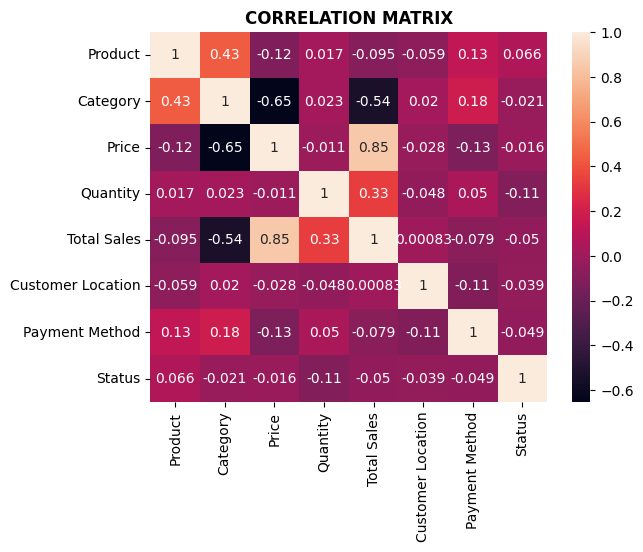

<Figure size 640x480 with 0 Axes>

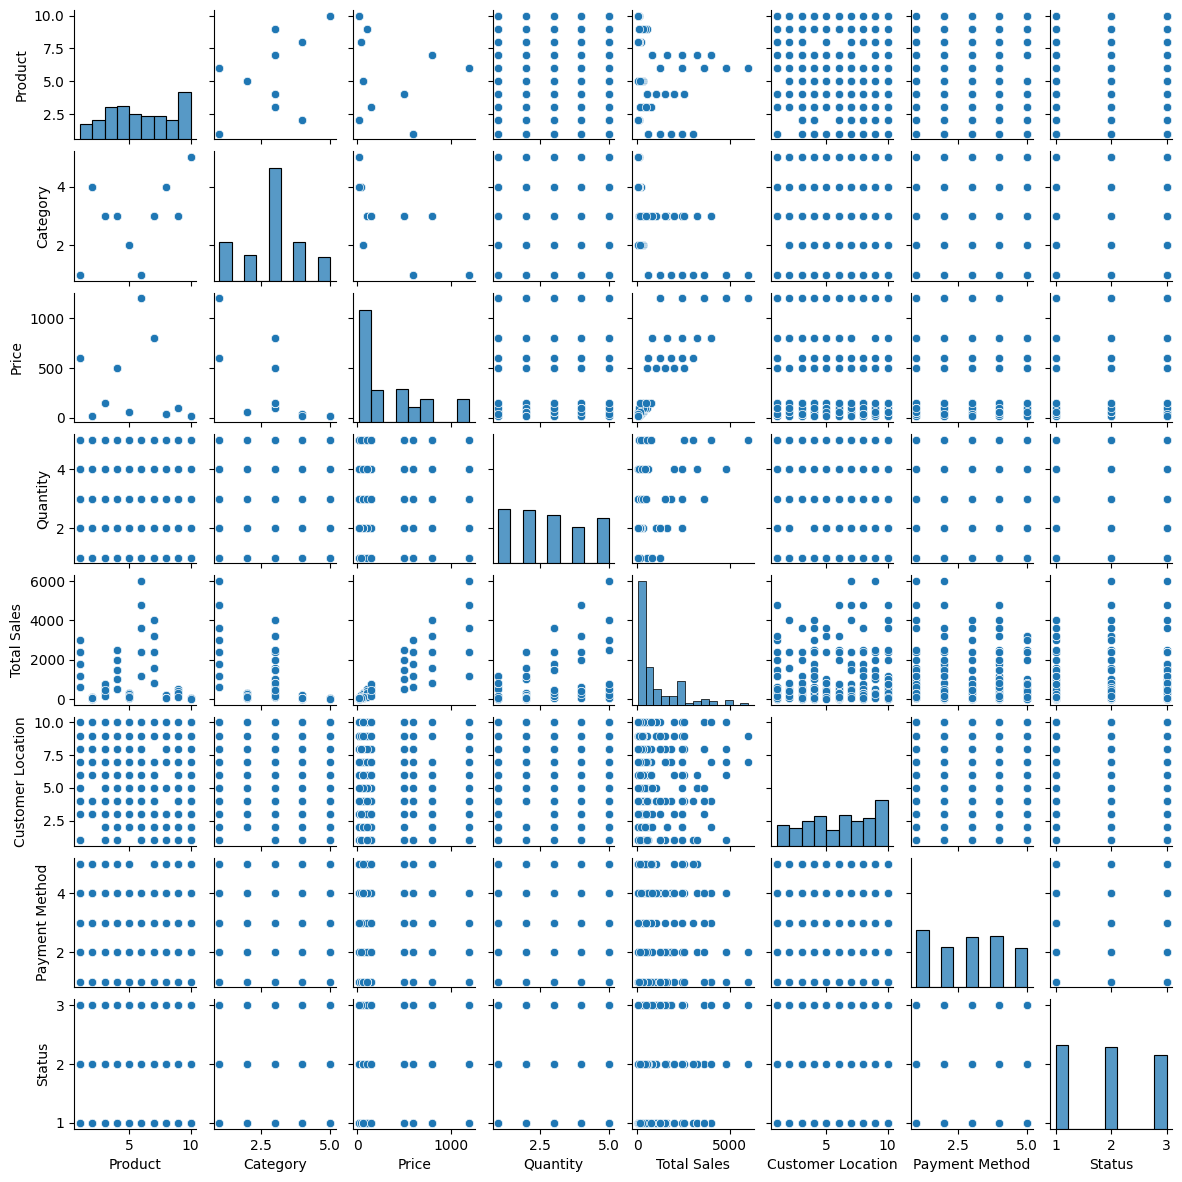


         Total Sales
Product             
1              27000
2               1060
3              15750
4              48500
5               4320
6              78000
7              58400
8               2480
9               7300
10              1035



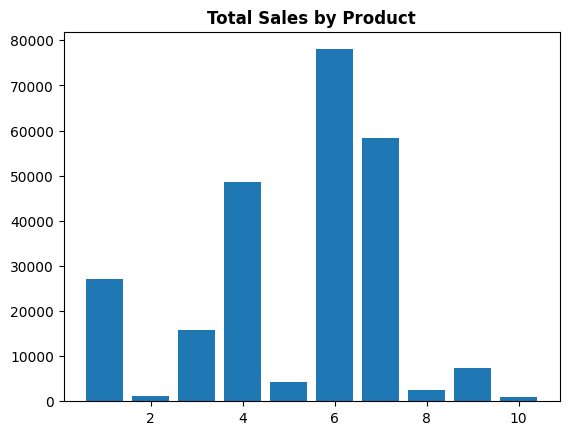


          Total Sales
Category             
1              105000
2                4320
3              129950
4                3540
5                1035




                   Total Sales
Customer Location             
1                        26890
2                        16195
3                        18940
4                        31700
5                        17820
6                        28390
7                        29785
8                        27145
9                        20810
10                       26170




                Total Sales
Payment Method             
1                     69645
2                     47955
3                     31900
4                     61595
5                     32750




Category      1     2      3     4     5
Product                                 
1         27000     0      0     0     0
2             0     0      0  1060     0
3             0     0  15750     0     0
4             0     0  48500     0     0
5             0  4320      0     0     0
6         78000     0      0     0     0
7             0     0  58400     0     0
8             0     0      0  2480     0
9             0     0   7300     0     0
10            0     0      0     0  1035



In [94]:
getEDA(preprocessData)